<a href="https://colab.research.google.com/github/systembug94/Lead_Scoring_Case_Study/blob/main/Lead_Scoring_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Lead Scoring Case Study`
*With so many predictor variables, we are required to select the most promising leads, thet is the leads that are most likely to convert into paying customers for education company X Education, which are in the business of selling online courses to industry professionals. The company has asked us to build a model in which we need to assign a 'lead score' to every one of the leads in a manner that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.*

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

# Data display customization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)


#importing sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

## Step 1: Reading and Understanding the Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading the dataset
# For Google Colab
# df_leads = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Files/MachineL/Leads.csv")
# For Jupiter Nootboks
df_leads = pd.read_csv('Leads.csv')

df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# checking shape of dataframe
df_leads.shape

(9240, 37)

In [5]:
# Checking details of the dataframe
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Descriptive statistics of dataframe
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# null count in each column in dataframe
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# Duplicate check

df_leads.loc[df_leads.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [9]:
# the original Conversion Rate
o_c_r = round((sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100, 2)
print("The conversion rate of leads is ",o_c_r)

The conversion rate of leads is  38.54


### Note:

- The leads dataset has 9240 rows and 37 columns.
- There are 7 numerical columns and 30 categorical columns
- There are many 'Select' values present in various columns in the dataset. These correspond to the user having not made any selection.
- There are missing values in many columns.
- There are no duplicates in the dataset
- The current conversion rate of leads based on given dataset is 38.54%

## Step 2: Data Cleaning

In [10]:
# Assuming 'Select' as 'NaN' as it is in a sense absence of data
df_leads = df_leads.replace('Select',np.nan)

In [11]:
# number of unique values for each column
df_leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

### Note:

 - #### As seen from above, some columns have only 1 unique value.
    Get updates on DM Content

    Update me on Supply Chain Content

    I agree to pay the amount through cheque

    Receive More Updates About Our Courses

    Magazine

 - #### Since these columns have only one unique value and no null values so we can drop them, since they wont contribute much to the model. 

In [12]:
# dropping single unique valued columns
df_leads= df_leads.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [13]:
# dropping 'Prospect ID', as it has all unique values

df_leads.drop(['Prospect ID'], 1, inplace = True)

In [14]:
# percentage of null values in each column

missing_val_percent = round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)
print(missing_val_percent)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

### Note:

 - #### There are  a few columns that have a high percentage(more than 45%) of missing values 
    
 - #### We will drop the columns with more than 45% null values.

In [15]:
df_leads.drop(columns=['Lead Profile','Lead Quality','How did you hear about X Education','Asymmetrique Activity Index', 'Asymmetrique Profile Index','Asymmetrique Activity Score', 'Asymmetrique Profile Score'],inplace=True)

In [16]:
# percentage of null values in each column after dropping columns having more than 45% null values

round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)


Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

### Note:

 - #### Some columns still have high percentage of null values, i.e. above 30%.

 - #### We will explore these columns individually to take care of null values in each column.

In [17]:
# City column

df_leads.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

In [18]:
df_leads.City.value_counts(normalize=True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

### Note:

 - #### Approximately 58% of the data is Mumbai so we can replace the missing values with 'Mumbai'.

In [19]:
df_leads['City'] = df_leads['City'].replace(np.nan,'Mumbai')

In [20]:
df_leads.City.value_counts(normalize=True)

Mumbai                         0.745779
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [21]:
# Specialization column
df_leads.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [22]:
df_leads.Specialization.value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

### Note

- #### 36% null values exist in the column, we will replace those with 'Others' since 'NaN' values have the highest percentage of values.

- #### Lead may not have mentioned specialization because it was not in the list or maybe they don't have a specialization yet. 

In [23]:
df_leads['Specialization'] = df_leads['Specialization'].replace(np.nan,'Others')

In [24]:
df_leads.Specialization.value_counts(normalize=True)

Others                               0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [25]:
# Tags column
df_leads.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [26]:
df_leads.Tags.value_counts(normalize=True)

Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in touch

### Note:

 - #### Tags column has 36% data with tag -"Will revert after reading the email" and 36% null values
 
 - #### These tags are added by sales team of the company and may vary with time since its added based on the understanding of the sales team. Hence not much reliable and we can drop this column

In [27]:
#drop Tags column
df_leads = df_leads.drop('Tags', axis=1)

In [28]:
# 'What matters most to you in choosing a course' column
df_leads['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [29]:
df_leads['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

### Note:

- #### This column is heavily skewed towards better career prospects. Hence we can drop this column since almost all candidates that take this course are looking to have a better career.

In [30]:
# drop 'What matters most to you in choosing a course' column
df_leads = df_leads.drop('What matters most to you in choosing a course', axis=1)

In [31]:
# 'What is your current occupation' column
df_leads['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [32]:
df_leads['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

### Note:

 - #### Around 85% of the data is Unemployed so we can impute the missing values with 'Unemployed' .

In [33]:
df_leads['What is your current occupation'] = df_leads['What is your current occupation'].replace(np.nan, 'Unemployed')

In [34]:
df_leads['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.897186
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [35]:
# country column
df_leads['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [36]:
df_leads['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

### Note:

 - #### Around 96% of the data is India and 27% data is missing . Hence dropping this column wont impact the model

In [37]:
# drop country column
df_leads = df_leads.drop('Country', axis=1)

In [38]:
# recheck for percentage of null values in each column 
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)


Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Specialization                            0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float6

In [39]:
# Now missing values are under 2% so we can drop them.
df_leads.dropna(inplace = True)

In [40]:
# recheck for percentage of null values in each column 
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

## Step 3: Univariate Analysis and Bi-variate Analysis 

### <u> Lead Origin



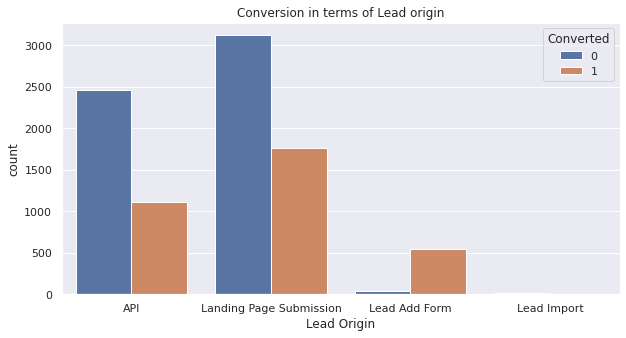

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = df_leads)
plt.title("Conversion in terms of Lead origin")
plt.show()

In [42]:
# def function: conversion summary
def conv_sumry(df,col):
    convert=df.pivot_table(values='Lead Number',index=col ,columns='Converted', aggfunc='count').fillna(0)
    convert["Conversion(%)"] =round(convert[1]/(convert[0]+convert[1]),2)*100
    print(convert.sort_values(ascending=False,by="Conversion(%)"))

In [43]:
conv_sumry(df_leads,"Lead Origin")

Converted                   0     1  Conversion(%)
Lead Origin                                       
Lead Add Form              37   544           94.0
Landing Page Submission  3118  1767           36.0
API                      2463  1115           31.0
Lead Import                21     9           30.0


### Note:
Based on the above plot and Lead origin conversion summary, we can infer that:

- The highest conversion rate is of 'Lead Add Form', at 94%
- 'Landing Page Submission' and 'API' have 36% and 31% conversion rate, respectively, but they generate maximum leads counts.
- 'Lead Import' has both the least amount of conversions and leads count.
- In order to improve overall lead conversion rate, the focus should be on improving the rate of 'API' and 'Landing Page Submission', also, on to generate more leads from 'Lead Add form' since they have a very good conversion rate.


### <u> Lead Source

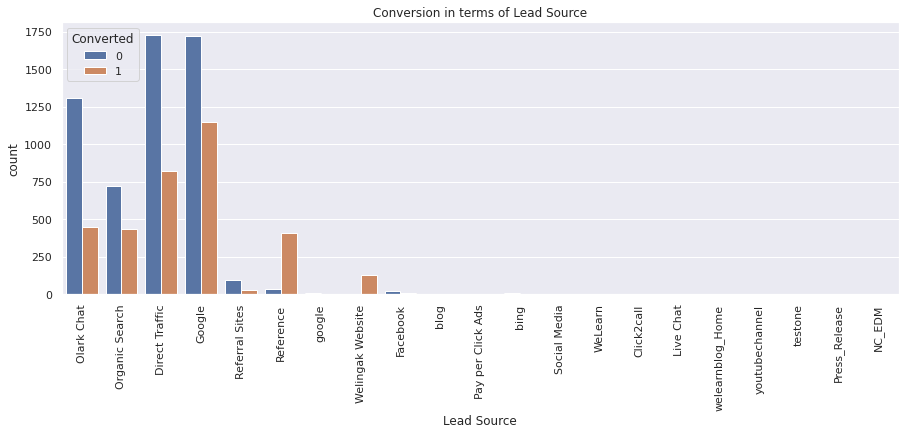

In [44]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df_leads)
plt.title("Conversion in terms of Lead Source")
plt.xticks(rotation=90)
plt.show()

### Note:

 - Some Lead sources have very low count.So, we can merge them into a common category 'Others'
 - Also, there are 2 categories with same name: 'Google' and 'google'. So, we can replace google with Google to have a single category.

In [45]:
df_leads['Lead Source'] = df_leads['Lead Source'].replace(['google'], 'Google')
df_leads['Lead Source'] = df_leads['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

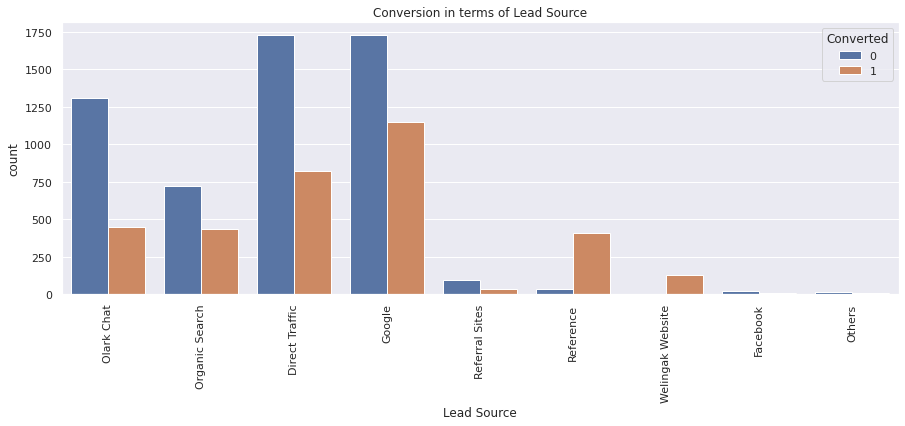

In [46]:
# regenerate the barplot to check the distribution
plt.figure(figsize=(15,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df_leads)
plt.title("Conversion in terms of Lead Source")
plt.xticks(rotation=90)
plt.show()

In [47]:
conv_sumry(df_leads,"Lead Source")

Converted            0     1  Conversion(%)
Lead Source                                
Welingak Website     2   127           98.0
Reference           33   410           93.0
Google            1726  1147           40.0
Others              14     9           39.0
Organic Search     718   436           38.0
Direct Traffic    1725   818           32.0
Facebook            22     9           29.0
Olark Chat        1305   448           26.0
Referral Sites      94    31           25.0


### Note:
From the above plot and Lead origin conversion summary, we can infer that:

 - 'Google' and 'Direct Traffic' is generating the maximum number of leads but it has a conversion rate of 40% and 32%.
 - 'Welingak Website' and 'References' has the highest conversion rates, around 98% and 93%, but they generate less number of leads.
 - 'Olark Chat' and 'Organic Search' has significant number of leads but their conversion rate is around 26% and 38% respectively.
 - Lead sources in 'Others' category such as 'Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release','Social Media', 'WeLearn', 'Bing', 'Blog', 'Testone', 'welearnblog_Home', 'youtubechannel' generates very less leads.

Now, in order to improve overall lead conversion rate, the focus should be on improving lead conversion of 'Olark Chat', 'Organic Search', 'Direct Traffic' and 'Google' lead sources. Also, on to generate more leads from 'Reference' and 'welingak website', since they have a very good conversion rate.

### <u> Do Not Email & Do Not Call
    


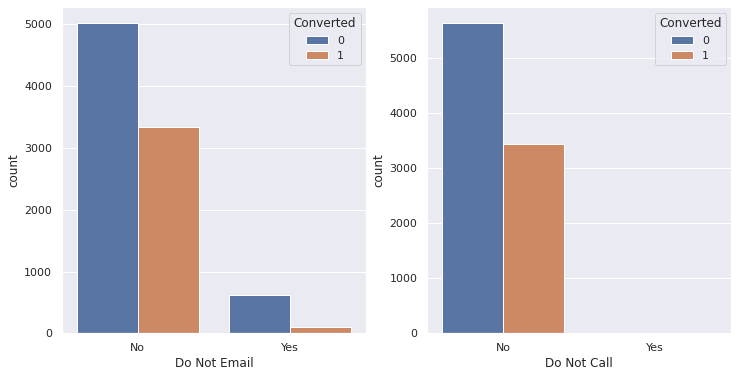

In [48]:
fig, axs = plt.subplots(1,2,figsize = (12,6))
sns.countplot(x = "Do Not Email", hue = "Converted", data = df_leads, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = df_leads, ax = axs[1])
plt.show()


In [49]:
conv_sumry(df_leads,"Do Not Email")

Converted        0     1  Conversion(%)
Do Not Email                           
No            5027  3331           40.0
Yes            612   104           15.0


In [50]:
conv_sumry(df_leads,"Do Not Call")

Converted         0       1  Conversion(%)
Do Not Call                               
Yes             0.0     2.0          100.0
No           5639.0  3433.0           38.0


### Note:
Based on the above plot and conversion summary, we can infer that around 99% of customers do not like to be called or receive emails about the course.


### <u> Total Visits

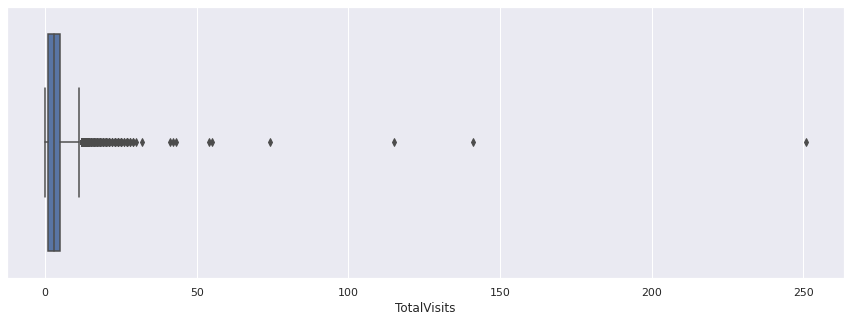

In [51]:
plt.figure(figsize=(15,5))
sns.boxplot(df_leads['TotalVisits'])
plt.show()

### Note:
There exist a number of outliers in Total Visits column. We will cap the outliers to 95%.


In [52]:
percentiles = df_leads['TotalVisits'].quantile([0.05,0.95]).values
df_leads['TotalVisits'][df_leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
df_leads['TotalVisits'][df_leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

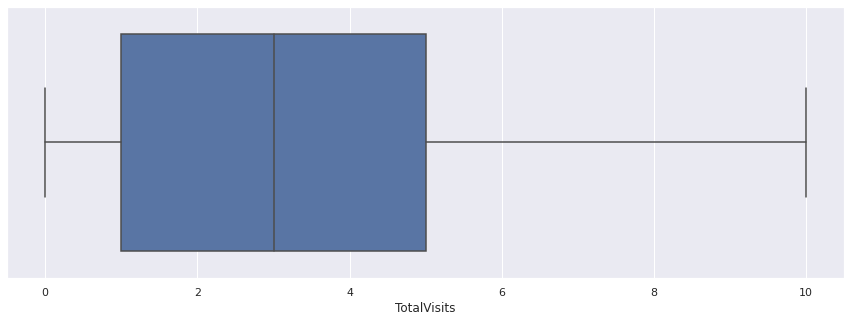

In [53]:
plt.figure(figsize=(15,5))
sns.boxplot(df_leads['TotalVisits'])
plt.show()

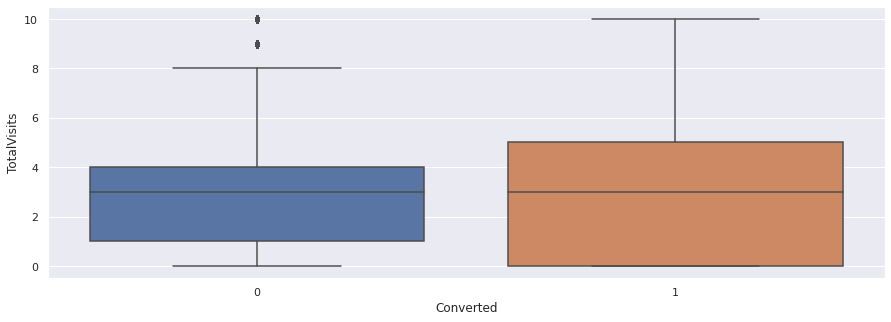

In [54]:
plt.figure(figsize=(15,5))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_leads)
plt.show()

### Note:
From the above boxplot, we can infer that:

- Median is same for converted and non-converted leads.
 
- People who visits the platform have equal chances of applying and not applying for the course, it is 50-50.


 ### <u> Total time spent on website

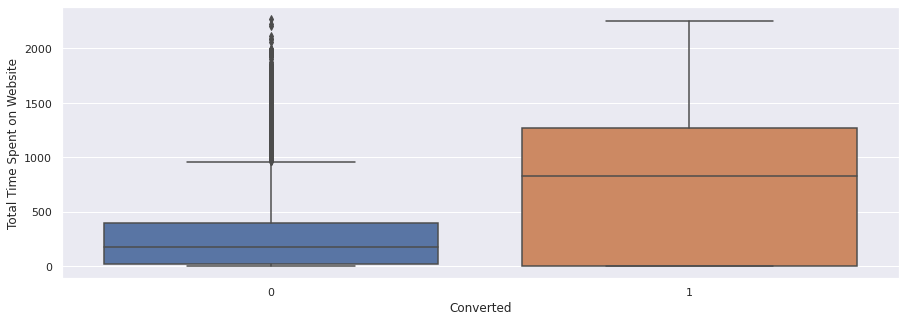

In [55]:
plt.figure(figsize=(15,5))
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_leads)
plt.show()

### Note:
Based on the the above boxplot, we can conclude that:

- More time people spend on the website, more chance there is of them opting for a course
 
- People who spend less time on the website didn't opt for any courses.


### <u> Page views per visit

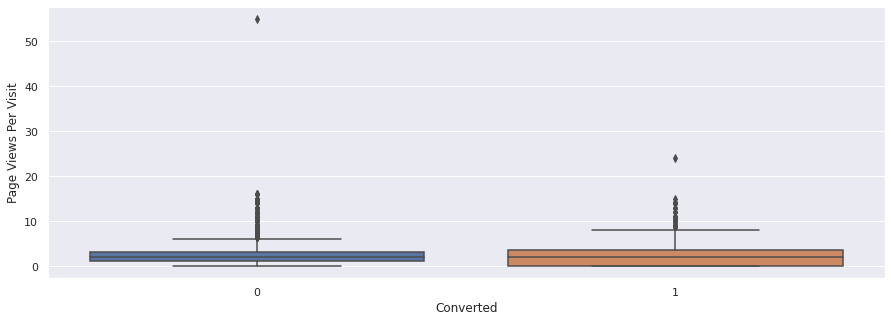

In [56]:
plt.figure(figsize=(15,5))
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_leads)
plt.show()

### Note:
There exist a number of outliers in 'Page views Per Visit' column. We will cap the outliers to 95% .


In [57]:
percentiles = df_leads['Page Views Per Visit'].quantile([0.05,0.95]).values
df_leads['Page Views Per Visit'][df_leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df_leads['Page Views Per Visit'][df_leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

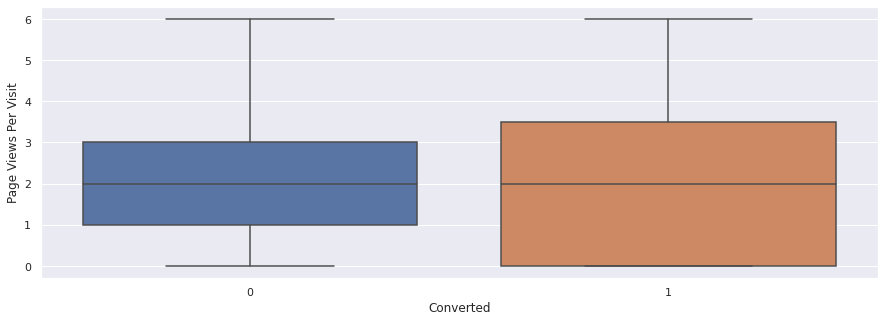

In [58]:
plt.figure(figsize=(15,5))
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_leads)
plt.show()

### Note:
Based on the above boxplot, we can conclude that:

- Median for converted and non-converted leads are same.
 
- People who visits 1 to 3 average number of pages on website have equal chances(50-50) of applying and not applying for the course.
    
- People who dont visit any pages have higher conversion chances.

### <u> Last Activity

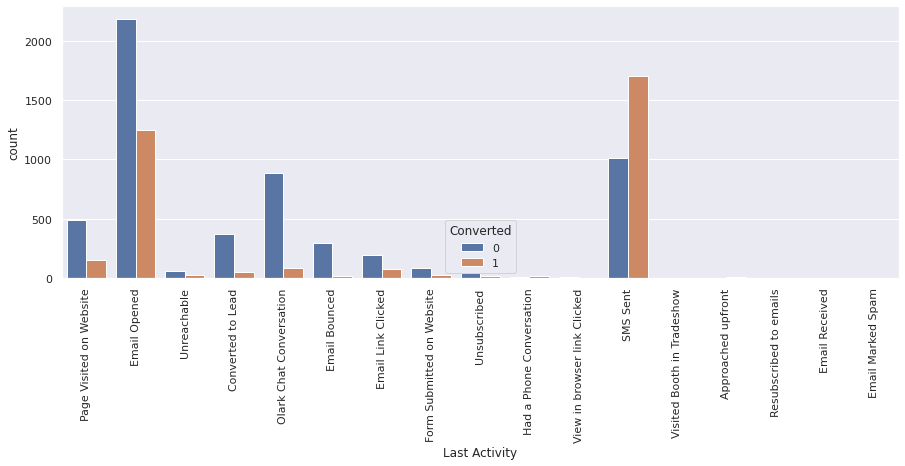

In [59]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = df_leads)
plt.xticks(rotation = 90)
plt.show()

In [60]:
conv_sumry(df_leads,"Last Activity")

Converted                          0       1  Conversion(%)
Last Activity                                              
Approached upfront               0.0     5.0          100.0
Email Marked Spam                0.0     2.0          100.0
Resubscribed to emails           0.0     1.0          100.0
Email Received                   0.0     2.0          100.0
Had a Phone Conversation         5.0    20.0           80.0
SMS Sent                      1011.0  1705.0           63.0
Email Opened                  2182.0  1250.0           36.0
Unreachable                     61.0    29.0           32.0
Email Link Clicked             194.0    73.0           27.0
Form Submitted on Website       88.0    28.0           24.0
Page Visited on Website        489.0   151.0           24.0
Unsubscribed                    45.0    14.0           24.0
View in browser link Clicked     5.0     1.0           17.0
Converted to Lead              374.0    54.0           13.0
Olark Chat Conversation        888.0    

### Note:
The above count plot shows us that:

- Currently maximum leads are being generated from people with last activity 'Email opened' and 'SMS sent'. Their conversion rate is around 36% and 63% .

- Least leads are being generated from people with last activity - 'Approached upfront', 'Email Marked Spam', 'Resubscribed to emails', 'emails received', 'View in browser link Clicked', 'Visited Booth in Tradeshow'.
 
- 'olark chat conversation' and 'Page Visited on Website' generates significant number of leads, but their conversion rate is around 9% and 24%.

In order to improve overall lead conversion rate, the focus should be on improving lead conversion of people with last activity 'olark chat conversation', 'SMS sent' and 'Page Visited on Website'.

### <u> Specialization

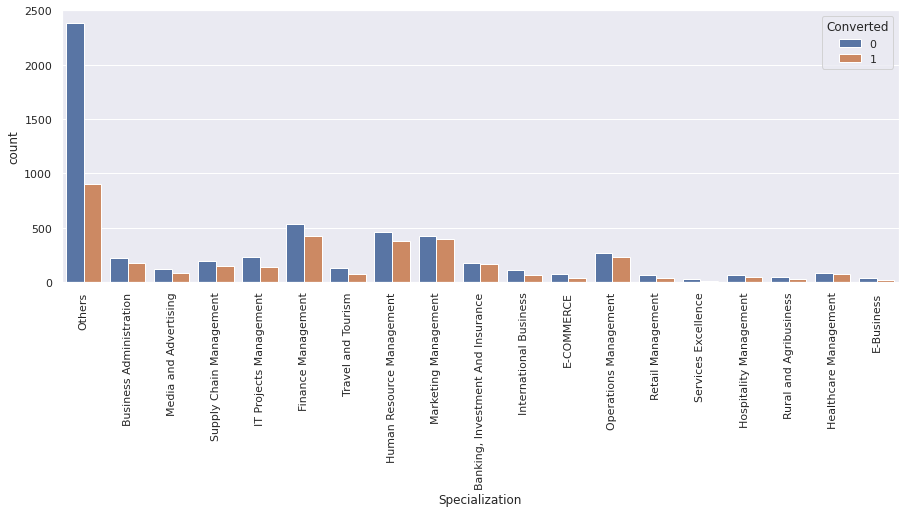

In [61]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = df_leads)
plt.xticks(rotation = 90)
plt.show()

In [62]:
conv_sumry(df_leads,"Specialization")

Converted                             0    1  Conversion(%)
Specialization                                             
Banking, Investment And Insurance   171  164           49.0
Healthcare Management                80   76           49.0
Marketing Management                426  397           48.0
Operations Management               265  234           47.0
Human Resource Management           457  380           45.0
Finance Management                  537  422           44.0
Business Administration             224  175           44.0
Supply Chain Management             198  148           43.0
Rural and Agribusiness               42   31           42.0
Media and Advertising               118   84           42.0
Hospitality Management               66   45           41.0
IT Projects Management              226  140           38.0
E-Business                           36   21           37.0
International Business              114   62           35.0
E-COMMERCE                           72 

### Notes:

Based the above plot and generated conversion summary, we can infer that most of the specialization have around 40-50% conversion rate.

### <u> Occupation

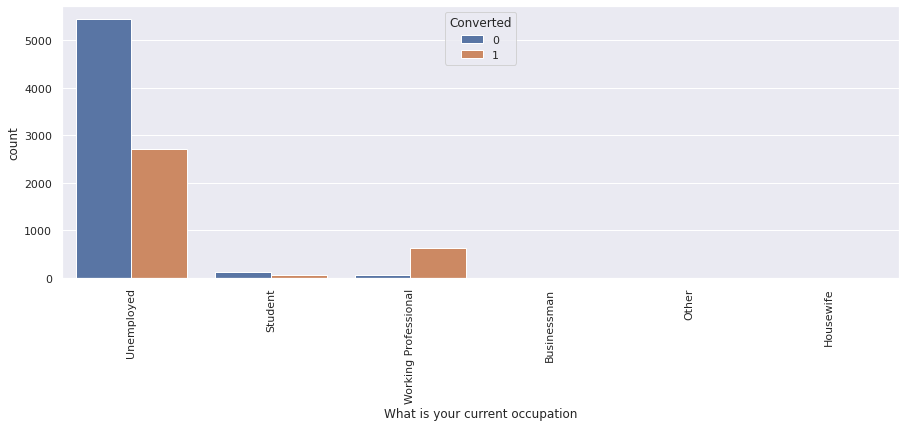

In [63]:
plt.figure(figsize=(15,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df_leads)
plt.xticks(rotation = 90)
plt.show()

In [64]:
conv_sumry(df_leads,"What is your current occupation")

Converted                             0       1  Conversion(%)
What is your current occupation                               
Housewife                           0.0     9.0          100.0
Working Professional               55.0   622.0           92.0
Businessman                         3.0     5.0           62.0
Other                               6.0     9.0           60.0
Student                           132.0    74.0           36.0
Unemployed                       5443.0  2716.0           33.0


### Observations

Based on above plot and generated conversion summary, we can infer that:

- Working Professionals and Unemployed people generates maximum leads.
 
- Conversion rate for Working Professionals is high around 92% and  Conversion rate for Unemployed is around 33%
 
- To improve overall lead conversion rate, focus should be on improving lead conversion of unemployed. Also, generate more leads from Working Professionals.

### <u>Search, Newspaper article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations

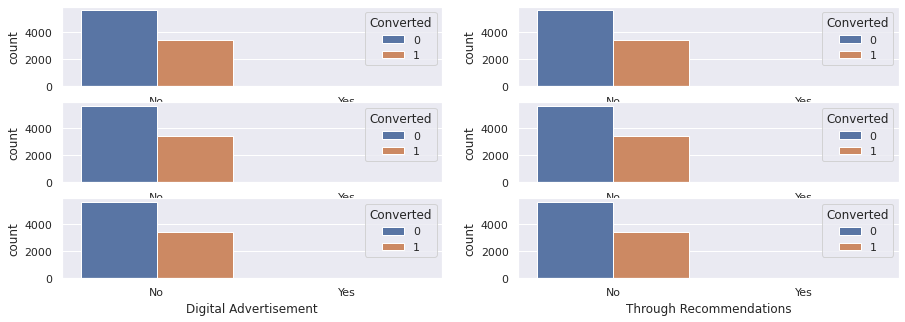

In [65]:
plt.figure(figsize=(15,5))

plt.subplot(3,2,1)
sns.countplot(x = "Search", hue = "Converted", data = df_leads)

plt.subplot(3,2,2)
sns.countplot(x = "Newspaper Article", hue = "Converted", data = df_leads)

plt.subplot(3,2,3)
sns.countplot(x = "X Education Forums", hue = "Converted", data = df_leads)

plt.subplot(3,2,4)
sns.countplot(x = "Newspaper", hue = "Converted", data = df_leads)

plt.subplot(3,2,5)
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = df_leads)

plt.subplot(3,2,6)
sns.countplot(x = "Through Recommendations", hue = "Converted", data = df_leads)

plt.show()

### Notes:
Almost 99% customers have not seen the X Education ad in search, Newspaper article, X Education Forums, Newspaper, Digital Advertisement or Through Recommendations.

 ### <u> City

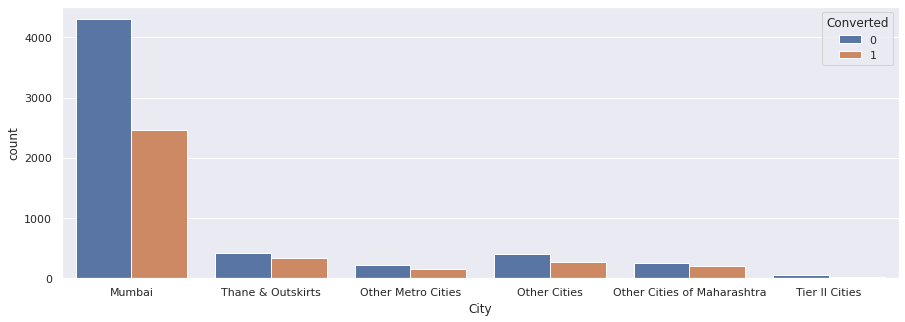

In [66]:
plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = df_leads)

plt.show()

In [67]:
conv_sumry(df_leads,"City")

Converted                       0     1  Conversion(%)
City                                                  
Thane & Outskirts             413   332           45.0
Other Cities of Maharashtra   250   196           44.0
Other Metro Cities            223   154           41.0
Other Cities                  408   272           40.0
Mumbai                       4296  2456           36.0
Tier II Cities                 49    25           34.0


### Note:
Maximum leads are being generated from the city of Mumbai, with conversion rate of around 36%. Hence focus should me more on increasing conversion rate of Mumbai city.

### <u> A free copy of Mastering The Interview

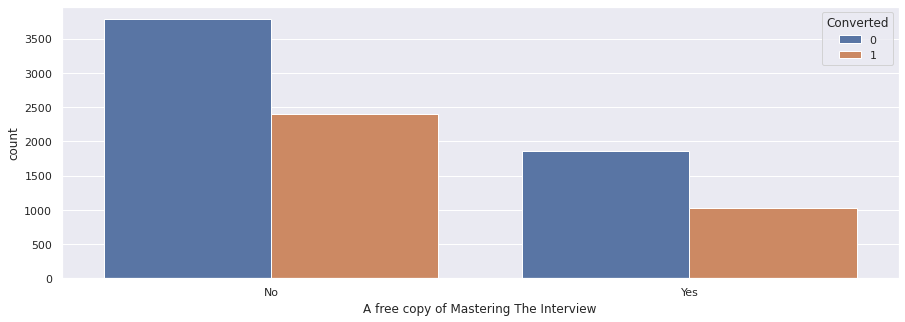

In [68]:
plt.figure(figsize=(15,5))
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = df_leads)

plt.show()

In [69]:
conv_sumry(df_leads,"A free copy of Mastering The Interview")

Converted                                  0     1  Conversion(%)
A free copy of Mastering The Interview                           
No                                      3781  2405           39.0
Yes                                     1858  1030           36.0


### Note:

- Most of the customers did not want the free copy of Mastering The Interview.
    
- Customers who opted for free copy had conversion rate of 36% while the ones who didnt opt had conversion rate of 39%.

 ### <u> Last Notable Activity

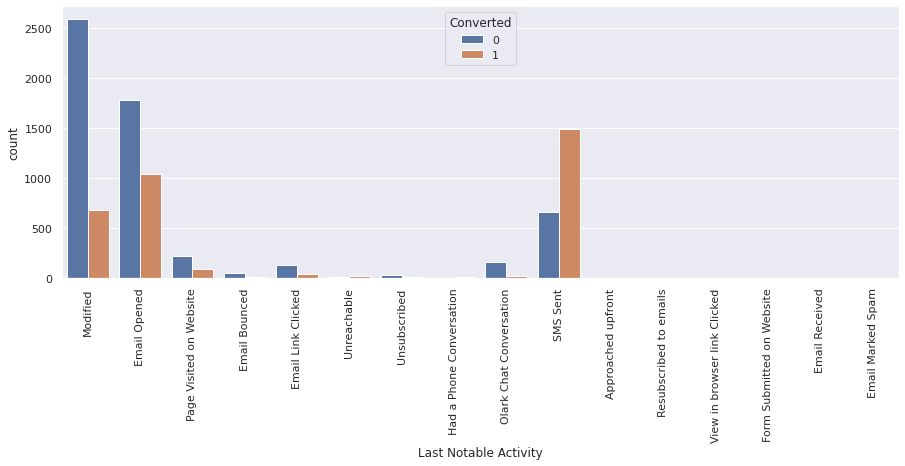

In [70]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df_leads)
plt.xticks(rotation = 90)
plt.show()

### Note: 

This column is very much similar to Last activity column

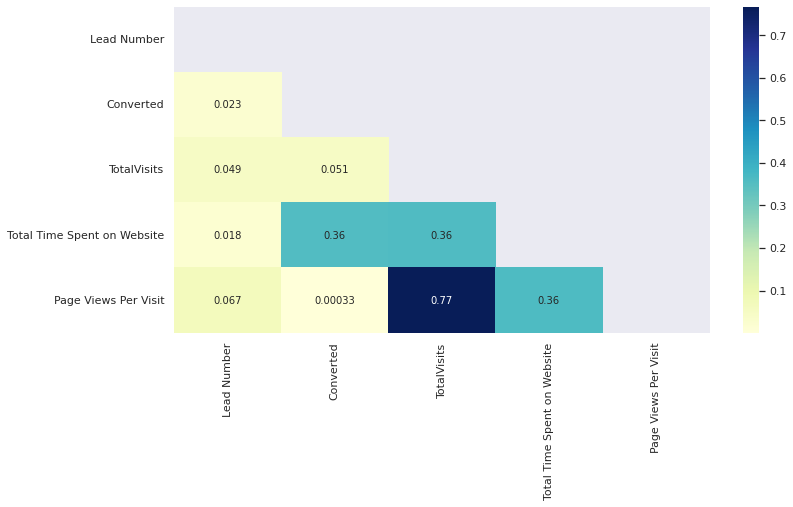

In [71]:
# checking the correlation among variables
plt.figure(figsize = (12,6))
mask = np.zeros_like(df_leads.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(df_leads.corr(), mask=mask,annot = True, cmap="YlGnBu")
plt.show()

### Note:

- 'Total visits' and 'Page views per visit' columns are correlated. 
- Hence we should have either of this column in our model to avoid multi-collinearity.
-Based on our data analysis, we conclude that many variables are not significant to the model.Hence we can drop them for further analysis

In [72]:
df_leads = df_leads.drop(['Lead Number','Search','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations'],1)

In [73]:
df_leads.shape

(9074, 14)

## Step 4: Data Preparation

### Converting binary variables (Yes/No) to (1/0)

In [74]:
# List of binary variables
varlist =  ['A free copy of Mastering The Interview','Do Not Email','Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the map function to the binary variables list
df_leads[varlist] = df_leads[varlist].apply(binary_map)

### Create a dummy variable for the categorical variables

In [75]:
dummy = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity']
dummy_data = pd.get_dummies(df_leads[dummy],drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [76]:
# Combining dummy data with the original dataset

df_leads = pd.concat([df_leads, dummy_data], axis=1)
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,0,Modified,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [77]:
# Drop the original columns 
drop_cols = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity','Lead Source_Others','Specialization_Others']
df_leads = df_leads.drop(drop_cols, axis=1)
df_leads.head()



,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [78]:
#check the shape of dataframe
df_leads.shape

(9074, 75)

## Step 5: Train-Test Split

In [79]:
# Putting feature variable to X
X = df_leads.drop(['Converted'], axis=1)


# Putting response variable to y
y = df_leads['Converted']

In [80]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 6: Feature Scaling

In [81]:
#create object of StandardScaler
scaler = StandardScaler()

#Apply scaler() to numerical columns
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Step 7: Feature Selection Using RFE

In [82]:
logreg = LogisticRegression()

# running RFE with 20 variables as output
rfe = RFE(logreg, n_features_to_select = 20, step=1) 
rfe = rfe.fit(X_train, y_train)

In [83]:
rfe.support_

array([ True, False, False,  True, False, False, False,  True,  True,
       False, False,  True, False,  True, False,  True,  True,  True,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True,  True,  True,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False,  True,  True,  True, False, False, False,
       False, False])

In [84]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 2),
 ('TotalVisits', False, 34),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 35),
 ('A free copy of Mastering The Interview', False, 45),
 ('Lead Origin_Landing Page Submission', False, 13),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 37),
 ('Lead Source_Google', False, 38),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 54),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 41),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 39),
 ('Last Activity_Email Marked Spam', False, 9),
 ('Last Activity_Email Opened', False, 51),
 ('Last Activity_Email Received', False, 50),
 ('Last Activity_Form Submitted on Website', False, 29),
 ('Last Activity_Had a Phone 

In [85]:
col1 = X_train.columns[rfe.support_]
col1

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [86]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Man

## Step 9: Model Building

In [87]:
#BUILDING MODEL #1
X_train_sm = sm.add_constant(X_train[col1])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2623.1
Date:                Tue, 24 Jan 2023   Deviance:                       5246.2
Time:                        00:37:04   Pearson chi2:                 6.40e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3765      0.603      2.282      0.022       0.194       2.559
Do Not Email                                            -1.6059      0.200     -8.040      0.000      -1.997      -1.214
Total Time Spent on Website                              1.1340      0.041     27.904      0.000       1.054       1.214
Lead Origin_Lead Add Form                                2.1380      0.927      2.308      0.021       0.322       3.954
Lead Origin_Lead Import                                  1.5445      0.457      3.378      0.001       0.648       2.441
Lead Source_Olark Chat                                   1.2434      0.104     11.904      0.000       1.039       1.448
Lead Source_Reference                                    1.8217      0.951      1.915      0.056      -0.043       3.686
Lead Source_Welingak Website                             3.8664      1.176      3.288      0.001       1.562       6.171
Last Activity_Converted to Lead                         -1.1086      0.228     -4.857      0.000      -1.556      -0.661
Last Activity_Email Bounced                             -1.2769      0.425     -3.002      0.003      -2.111      -0.443
Last Activity_Had a Phone Conversation                   1.9240      0.783      2.458      0.014       0.390       3.458
Last Activity_Olark Chat Conversation                   -1.3307      0.191     -6.983      0.000      -1.704      -0.957
What is your current occupation_Housewife               21.6424   1.57e+04      0.001      0.999   -3.08e+04    3.08e+04
What is your current occupation_Student                 -0.7930      0.638     -1.242      0.214      -2.044       0.458
What is your current occupation_Unemployed              -1.1988      0.599     -2.001      0.045      -2.373      -0.024
What is your current occupation_Working Professional     1.5641      0.626      2.498      0.012       0.337       2.791
Last Notable Activity_Email Link Clicked                -1.8842      0.255     -7.377      0.000      -2.385      -1.384
Last Notable Activity_Email Opened                      -1.4250      0.088    -16.122      0.000      -1.598      -1.252
Last Notable Activity_Modified                          -1.7447      0.100    -17.394      0.000      -1.941      -1.548
Last Notable Activity_Olark Chat Conversation           -1.5331      0.369     -4.152      0.000      -2.257      -0.809
Last Notable Activity_Page Visited on Website           -1.6991      0.202     -8.399      0.000      -2.096      -1.303
========================================================================================================================
"""

In [88]:
#check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,62.43
5,Lead Source_Reference,48.09
6,Lead Source_Welingak Website,15.47
13,What is your current occupation_Unemployed,4.40
17,Last Notable Activity_Modified,3.09
16,Last Notable Activity_Email Opened,2.27
10,Last Activity_Olark Chat Conversation,1.99
0,Do Not Email,1.86
4,Lead Source_Olark Chat,1.78
8,Last Activity_Email Bounced,1.76


### Note:
 - The p value for column 'What is your current occupation_Housewife' is very high and is above the accepted threshold. Hence we will drop this column from our model.

In [89]:
col2 = col1.drop('What is your current occupation_Housewife',1)
col2

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [90]:
#BUILDING MODEL #2
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2625.0
Date:                Tue, 24 Jan 2023   Deviance:                       5249.9
Time:                        00:37:05   Pearson chi2:                 6.41e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.8072      0.557      3.245      0.001       0.716       2.899
Do Not Email                                            -1.6087      0.200     -8.045      0.000      -2.001      -1.217
Total Time Spent on Website                              1.1329      0.041     27.899      0.000       1.053       1.213
Lead Origin_Lead Add Form                                2.1374      0.926      2.307      0.021       0.322       3.953
Lead Origin_Lead Import                                  1.5422      0.457      3.373      0.001       0.646       2.438
Lead Source_Olark Chat                                   1.2414      0.104     11.887      0.000       1.037       1.446
Lead Source_Reference                                    1.8263      0.951      1.920      0.055      -0.038       3.691
Lead Source_Welingak Website                             3.8666      1.176      3.288      0.001       1.562       6.171
Last Activity_Converted to Lead                         -1.1055      0.228     -4.844      0.000      -1.553      -0.658
Last Activity_Email Bounced                             -1.2726      0.426     -2.991      0.003      -2.107      -0.439
Last Activity_Had a Phone Conversation                   1.9249      0.783      2.459      0.014       0.391       3.459
Last Activity_Olark Chat Conversation                   -1.3304      0.191     -6.976      0.000      -1.704      -0.957
What is your current occupation_Student                 -1.2238      0.595     -2.057      0.040      -2.390      -0.058
What is your current occupation_Unemployed              -1.6290      0.553     -2.946      0.003      -2.713      -0.545
What is your current occupation_Working Professional     1.1336      0.582      1.948      0.051      -0.007       2.274
Last Notable Activity_Email Link Clicked                -1.8809      0.255     -7.378      0.000      -2.381      -1.381
Last Notable Activity_Email Opened                      -1.4229      0.088    -16.103      0.000      -1.596      -1.250
Last Notable Activity_Modified                          -1.7475      0.100    -17.419      0.000      -1.944      -1.551
Last Notable Activity_Olark Chat Conversation           -1.5323      0.369     -4.150      0.000      -2.256      -0.809
Last Notable Activity_Page Visited on Website           -1.7018      0.202     -8.416      0.000      -2.098      -1.305
========================================================================================================================
"""

In [91]:
#check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,62.43
5,Lead Source_Reference,48.08
6,Lead Source_Welingak Website,15.47
12,What is your current occupation_Unemployed,4.37
16,Last Notable Activity_Modified,3.08
15,Last Notable Activity_Email Opened,2.25
10,Last Activity_Olark Chat Conversation,1.99
0,Do Not Email,1.86
4,Lead Source_Olark Chat,1.78
8,Last Activity_Email Bounced,1.76


### Note:
 - The p value and VIF value for column 'Lead Source_Reference' is high and above accepted the threshold. Hence we will drop this column.

In [92]:
col3 = col2.drop('Lead Source_Reference',1)
col3

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [93]:
#BUILDING MODEL #3
X_train_sm = sm.add_constant(X_train[col3])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2626.5
Date:                Tue, 24 Jan 2023   Deviance:                       5252.9
Time:                        00:37:05   Pearson chi2:                 6.38e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.8104      0.556      3.254      0.001       0.720       2.901
Do Not Email                                            -1.6042      0.200     -8.036      0.000      -1.995      -1.213
Total Time Spent on Website                              1.1321      0.041     27.879      0.000       1.053       1.212
Lead Origin_Lead Add Form                                3.8941      0.222     17.525      0.000       3.459       4.330
Lead Origin_Lead Import                                  1.5407      0.457      3.370      0.001       0.645       2.437
Lead Source_Olark Chat                                   1.2385      0.104     11.854      0.000       1.034       1.443
Lead Source_Welingak Website                             2.1077      0.755      2.792      0.005       0.628       3.587
Last Activity_Converted to Lead                         -1.1061      0.228     -4.848      0.000      -1.553      -0.659
Last Activity_Email Bounced                             -1.2767      0.425     -3.001      0.003      -2.110      -0.443
Last Activity_Had a Phone Conversation                   1.9242      0.783      2.459      0.014       0.390       3.458
Last Activity_Olark Chat Conversation                   -1.3294      0.191     -6.972      0.000      -1.703      -0.956
What is your current occupation_Student                 -1.2245      0.594     -2.060      0.039      -2.389      -0.060
What is your current occupation_Unemployed              -1.6322      0.552     -2.956      0.003      -2.715      -0.550
What is your current occupation_Working Professional     1.1322      0.581      1.948      0.051      -0.007       2.271
Last Notable Activity_Email Link Clicked                -1.8768      0.255     -7.372      0.000      -2.376      -1.378
Last Notable Activity_Email Opened                      -1.4222      0.088    -16.099      0.000      -1.595      -1.249
Last Notable Activity_Modified                          -1.7466      0.100    -17.418      0.000      -1.943      -1.550
Last Notable Activity_Olark Chat Conversation           -1.5312      0.369     -4.148      0.000      -2.255      -0.808
Last Notable Activity_Page Visited on Website           -1.7066      0.203     -8.422      0.000      -2.104      -1.309
========================================================================================================================
"""

In [94]:
#check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,4.37
15,Last Notable Activity_Modified,3.08
14,Last Notable Activity_Email Opened,2.25
9,Last Activity_Olark Chat Conversation,1.99
0,Do Not Email,1.86
4,Lead Source_Olark Chat,1.78
7,Last Activity_Email Bounced,1.76
2,Lead Origin_Lead Add Form,1.61
16,Last Notable Activity_Olark Chat Conversation,1.38
5,Lead Source_Welingak Website,1.33


### Note
 - The VIF value for column 'What is your current occupation_Unemployed' is high and is above the acceptable threshold.Hence we will drop it.

In [95]:
col4 = col3.drop('What is your current occupation_Unemployed',1)
col4

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [96]:
#BUILDING MODEL #4
X_train_sm = sm.add_constant(X_train[col4])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2631.3
Date:                Tue, 24 Jan 2023   Deviance:                       5262.6
Time:                        00:37:05   Pearson chi2:                 6.40e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1783      0.069      2.576      0.010       0.043       0.314
Do Not Email                                            -1.5942      0.199     -8.009      0.000      -1.984      -1.204
Total Time Spent on Website                              1.1346      0.041     27.953      0.000       1.055       1.214
Lead Origin_Lead Add Form                                3.9140      0.222     17.634      0.000       3.479       4.349
Lead Origin_Lead Import                                  1.5329      0.457      3.354      0.001       0.637       2.429
Lead Source_Olark Chat                                   1.2350      0.104     11.832      0.000       1.030       1.440
Lead Source_Welingak Website                             2.0798      0.755      2.755      0.006       0.600       3.559
Last Activity_Converted to Lead                         -1.1190      0.228     -4.905      0.000      -1.566      -0.672
Last Activity_Email Bounced                             -1.2905      0.425     -3.037      0.002      -2.123      -0.458
Last Activity_Had a Phone Conversation                   1.9182      0.782      2.454      0.014       0.386       3.451
Last Activity_Olark Chat Conversation                   -1.3288      0.190     -6.978      0.000      -1.702      -0.956
What is your current occupation_Student                  0.3988      0.226      1.763      0.078      -0.044       0.842
What is your current occupation_Working Professional     2.7561      0.189     14.578      0.000       2.386       3.127
Last Notable Activity_Email Link Clicked                -1.8657      0.253     -7.362      0.000      -2.362      -1.369
Last Notable Activity_Email Opened                      -1.4120      0.088    -16.004      0.000      -1.585      -1.239
Last Notable Activity_Modified                          -1.7343      0.100    -17.330      0.000      -1.931      -1.538
Last Notable Activity_Olark Chat Conversation           -1.5295      0.369     -4.144      0.000      -2.253      -0.806
Last Notable Activity_Page Visited on Website           -1.6988      0.203     -8.373      0.000      -2.096      -1.301
========================================================================================================================
"""

In [97]:
#check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col4].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Activity_Olark Chat Conversation,1.99
14,Last Notable Activity_Modified,1.87
0,Do Not Email,1.78
7,Last Activity_Email Bounced,1.76
4,Lead Source_Olark Chat,1.65
2,Lead Origin_Lead Add Form,1.54
15,Last Notable Activity_Olark Chat Conversation,1.33
5,Lead Source_Welingak Website,1.33
1,Total Time Spent on Website,1.24
6,Last Activity_Converted to Lead,1.23


### Observation
- The VIF value for column 'What is your current occupation_Student' is high and above the acceptable threshold. Hence we will drop it.

In [98]:
col5 = col4.drop('What is your current occupation_Student',1)
col5

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [99]:
#BUILDING MODEL #5
X_train_sm = sm.add_constant(X_train[col5])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2632.8
Date:                Tue, 24 Jan 2023   Deviance:                       5265.6
Time:                        00:37:06   Pearson chi2:                 6.41e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1829      0.069      2.646      0.008       0.047       0.318
Do Not Email                                            -1.5927      0.199     -8.002      0.000      -1.983      -1.203
Total Time Spent on Website                              1.1343      0.041     27.954      0.000       1.055       1.214
Lead Origin_Lead Add Form                                3.9204      0.222     17.674      0.000       3.486       4.355
Lead Origin_Lead Import                                  1.5214      0.457      3.330      0.001       0.626       2.417
Lead Source_Olark Chat                                   1.2364      0.104     11.843      0.000       1.032       1.441
Lead Source_Welingak Website                             2.0647      0.755      2.736      0.006       0.586       3.544
Last Activity_Converted to Lead                         -1.1169      0.228     -4.893      0.000      -1.564      -0.669
Last Activity_Email Bounced                             -1.2823      0.425     -3.017      0.003      -2.115      -0.449
Last Activity_Had a Phone Conversation                   1.9128      0.782      2.447      0.014       0.381       3.445
Last Activity_Olark Chat Conversation                   -1.3242      0.190     -6.957      0.000      -1.697      -0.951
What is your current occupation_Working Professional     2.7461      0.189     14.533      0.000       2.376       3.116
Last Notable Activity_Email Link Clicked                -1.8622      0.254     -7.345      0.000      -2.359      -1.365
Last Notable Activity_Email Opened                      -1.4026      0.088    -15.945      0.000      -1.575      -1.230
Last Notable Activity_Modified                          -1.7327      0.100    -17.320      0.000      -1.929      -1.537
Last Notable Activity_Olark Chat Conversation           -1.5183      0.369     -4.120      0.000      -2.241      -0.796
Last Notable Activity_Page Visited on Website           -1.6947      0.203     -8.357      0.000      -2.092      -1.297
========================================================================================================================
"""

In [100]:
#check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col4].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Activity_Olark Chat Conversation,1.99
14,Last Notable Activity_Modified,1.87
0,Do Not Email,1.78
7,Last Activity_Email Bounced,1.76
4,Lead Source_Olark Chat,1.65
2,Lead Origin_Lead Add Form,1.54
15,Last Notable Activity_Olark Chat Conversation,1.33
5,Lead Source_Welingak Website,1.33
1,Total Time Spent on Website,1.24
6,Last Activity_Converted to Lead,1.23


### Note:

 - The VIF values of all the variables are under the threshold value 3.
 - The p value of all variables are under threshold value 0.05.
 - Hence we will consider Model 5 as our final model for further analysis
    




In [101]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.197571
1012    0.363877
9226    0.210578
4750    0.885636
7987    0.676740
1281    0.772547
2880    0.098016
4971    0.912332
7536    0.868626
1248    0.635935
dtype: float64

In [102]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]


array([0.19757088, 0.36387657, 0.21057782, 0.88563556, 0.67673952,
       0.7725475 , 0.09801603, 0.91233213, 0.86862589, 0.63593451])

### Creating a dataframe with the actual 'Converted' flag and the predicted 'Lead_Score_Prob' probabilities

In [103]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Score_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()


,Converted,Lead_Score_Prob,Prospect ID
0,0,0.197571,3009
1,0,0.363877,1012
2,0,0.210578,9226
3,1,0.885636,4750
4,1,0.676740,7987


In [104]:
#Creating new column 'Predicted' with value 1 if Lead_Score_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,predicted
0,0,0.197571,3009,0
1,0,0.363877,1012,0
2,0,0.210578,9226,0
3,1,0.885636,4750,1
4,1,0.676740,7987,1


## Step 10: Model Evaluation

In [105]:
# Confusion matrix 
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3456  449]
 [ 732 1714]]


In [106]:
# check the overall accuracy.
print(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8140450322783813


In [107]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [108]:
# Let us calculate sensitivity 
round((TP / float(TP+FN)),2)

0.7

In [109]:
# Let us calculate specificity
round((TN / float(TN+FP)),2)

0.89

In [110]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.11498079385403329


In [111]:
# positive predictive value 
print (TP / float(TP+FP))

0.7924179380490061


In [112]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8252148997134671


## Step 11: Plotting the ROC Curve


- ROC shows the tradeoff between sensitivity and specificity.
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test will be deemed.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test will be deemed.

In [113]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [114]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted, y_train_pred_final.Lead_Score_Prob, drop_intermediate = False )

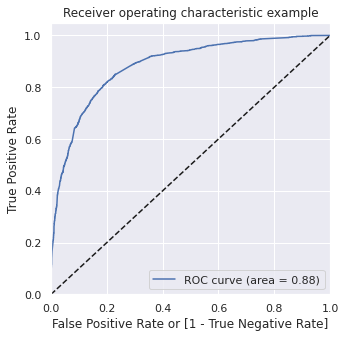

In [115]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Lead_Score_Prob)

#### A good ROC Curve should be of a value close to 1. We are getting a value of 0.88, which indicates a good predictive model.

## Step 12: Finding Optimal Cutoff Point

#### Above we had selected an arbitrary cut-off value, 0.5. We need to determine the best cut-off value.

#### Optimal cutoff probability is that probility where we get balanced sensitivity and specificity.

In [116]:
# create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.197571,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.363877,1012,0,1,1,1,1,0,0,0,0,0,0
2,0,0.210578,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.885636,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.676740,7987,1,1,1,1,1,1,1,1,0,0,0


In [117]:
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificty'])


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificty
0.0          0.0  0.385136     1.000000    0.000000
0.1          0.1  0.593922     0.971382    0.357490
0.2          0.2  0.749646     0.919052    0.643534
0.3          0.3  0.801449     0.843827    0.774904
0.4          0.4  0.813730     0.771055    0.840461
0.5          0.5  0.814045     0.700736    0.885019
0.6          0.6  0.809951     0.639411    0.916773
0.7          0.7  0.780192     0.512265    0.948015
0.8          0.8  0.757833     0.418234    0.970551
0.9          0.9  0.713431     0.274325    0.988476


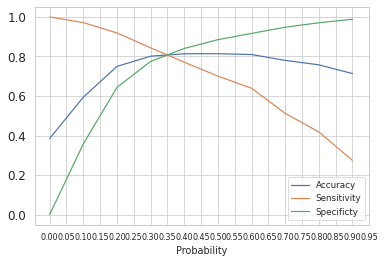

In [118]:
# accuracy sensitivity and specificity for various probabilities.

sns.set_style('whitegrid')
sns.set_context('paper')

cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificty'])
plt.xticks(np.arange(0,1,step=.05), size=8)
plt.yticks(size=12)
plt.show()

### Note:

Based on the above curve we can see that the optimal cutoff is at 0.35. That is the point where all the parameters - Accuracy, Sensitivity, Specificity are equally balanced.

In [119]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.197571,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.363877,1012,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.210578,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.885636,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.676740,7987,1,1,1,1,1,1,1,1,0,0,0,1


In [120]:
# Assigning lead score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Lead_Score_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.197571,3009,0,1,1,0,0,0,0,0,0,0,0,0,20
1,0,0.363877,1012,0,1,1,1,1,0,0,0,0,0,0,1,36
2,0,0.210578,9226,0,1,1,1,0,0,0,0,0,0,0,0,21
3,1,0.885636,4750,1,1,1,1,1,1,1,1,1,1,0,1,89
4,1,0.676740,7987,1,1,1,1,1,1,1,1,0,0,0,1,68


In [121]:
# check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8096362777515352

In [122]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3161,  744],
       [ 465, 1981]])

In [123]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [124]:
# Let's check the sensitivity 
TP / float(TP+FN)

0.8098937040065413

In [125]:
# Let us calculate specificity
TN / float(TN+FP)

0.8094750320102433

In [126]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.1905249679897567


In [127]:
# positive predictive value 
print (TP / float(TP+FP))

0.7269724770642202


In [128]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8717595146166575


### Note:

When the optimal cutoff is selected to be 0.35, the various performance parameters, that is Accuracy, Sensitivity & Specificity, are all 80%.

## Step 13: Metrics - Precision and Recall
To attain more stability, and predict successfully in a model, one needs to check two important parameters - 'precision' and 'recall'. They tells us the score for result relevancy and how many truly relevant results are returned.

In [129]:
#Calculating Precision
precision =round(TP/float(TP+FP),2)
precision

0.73

In [130]:
#Calculating Recall
recall = round(TP/float(TP+FN),2)
recall

0.81

In [131]:
#Calculating precision using precision_score function from sklearn
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.7269724770642202

In [132]:
#Calculating recall using recall_score function from sklearn
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8098937040065413

### Note:

In accordance to our business objective, the recall percentage is significant as we do not want to leave out any hot leads which are willing to get converted. Hence Recall value 81% suggest a good model.


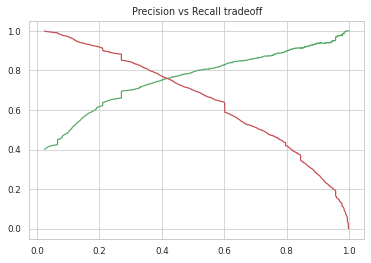

In [133]:
# generate the Precision vs Recall tradeoff curve 
p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final['Lead_Score_Prob'])
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()


#### As seen from above plot, there is a tradeoff between Precision and Recall. Precision and Recall are inversely related, so if one increases other will decrease.

## Step 14: Making predictions on the test set.

In [134]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [135]:
X_test = X_test[col5]

X_test.shape

(2723, 16)

In [136]:
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,0,-0.600595,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1490,0,1.887326,0,0,0,0,0,0,0,0,1,0,1,0,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4216,0,-0.888650,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3830,0,-0.587751,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [137]:
# add constant
X_test_sm = sm.add_constant(X_test)

In [138]:
# making predictions on test set
y_test_pred = res.predict(X_test_sm)

In [139]:
y_test_pred[:10]

3271    0.129991
1490    0.975088
7936    0.111671
4216    0.796172
3830    0.131647
1800    0.662953
6507    0.364313
4821    0.308232
4223    0.956694
4714    0.210578
dtype: float64

In [140]:
# Converting array y_test_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.129991
1490,0.975088
7936,0.111671
4216,0.796172
3830,0.131647


In [141]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [142]:
# Putting prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [143]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [144]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [145]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.129991
1,1,1490,0.975088
2,0,7936,0.111671
3,1,4216,0.796172
4,0,3830,0.131647


In [146]:
# Renaming the column 0 to  Lead_Score_Prob

y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Score_Prob'})

In [147]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Lead_Score_Prob'], axis=1)

In [148]:
# Adding Lead_Score column

y_pred_final['Lead_Score'] = round((y_pred_final['Lead_Score_Prob'] * 100),0)

y_pred_final['Lead_Score'] = y_pred_final['Lead_Score'].astype(int)

In [149]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Lead_Score_Prob,Lead_Score
0,3271,0,0.129991,13
1,1490,1,0.975088,98
2,7936,0,0.111671,11
3,4216,1,0.796172,80
4,3830,0,0.131647,13


In [150]:
y_pred_final['final_Predicted'] = y_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [151]:
y_pred_final.head()

,Prospect ID,Converted,Lead_Score_Prob,Lead_Score,final_Predicted
0,3271,0,0.129991,13,0
1,1490,1,0.975088,98,1
2,7936,0,0.111671,11,0
3,4216,1,0.796172,80,1
4,3830,0,0.131647,13,0


In [152]:
# classifying leads based on Lead score
y_pred_final['Lead_Type'] = y_pred_final.Lead_Score.map(lambda x: 'Hot Lead' if x >35 else 'Cold Lead')
y_pred_final.sort_values(by='Lead_Score', ascending = False)

,Prospect ID,Converted,Lead_Score_Prob,Lead_Score,final_Predicted,Lead_Type
215,5785,1,0.997103,100,1,Hot Lead
571,8106,1,0.997103,100,1,Hot Lead
2270,8505,1,0.995941,100,1,Hot Lead
1137,5815,1,0.995157,100,1,Hot Lead
1867,2598,1,0.997103,100,1,Hot Lead
...,...,...,...,...,...,...
673,7488,0,0.004988,0,0,Cold Lead
870,7426,0,0.004631,0,0,Cold Lead
1858,7557,0,0.004497,0,0,Cold Lead
895,6527,0,0.004508,0,0,Cold Lead


In [153]:
# check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8035255233198678

In [154]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1403,  331],
       [ 204,  785]])

In [155]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [156]:
# the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7937310414560161

In [157]:
# calculate specificity
TN / float(TN+FP)

0.8091118800461361

In [158]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.703405017921147

In [159]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7937310414560161

### Final Observation:
Comparing the  Model Performance parameters obtained for Train & Test data:

 - #### Train Data: 
#### Accuracy : 80.96%
#### Sensitivity : 80.98%
#### Specificity : 80.94%
#### Precision : 72.69%
#### Recall : 80.98%



 - #### Test Data: 
#### Accuracy : 80.35%
#### Sensitivity : 79.37%
#### Specificity : 80.91%
#### Precision : 70.34%
#### Recall : 79.37%

### Note: 


- There is around 1% difference on train and test data's performance metrics. This means that the final model did not overfit training data and is performing well.

- High Sensitivity will make sure that all possible leads who are likely to convert are correctly predicted, where as high Specificity will ensure that the leads that are on the brink of the probability of getting converted or not are not selected.

- Based on the business requirement, we can increase or decrease the probability threshold value which in turn will decrease or increase the Sensitivity and increase or decrease the Specificity of the model as required.

### Determining Feature Importance
Choosing the coefficients of the selected features from the final model,  excluding the intercept.

In [160]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Do Not Email                                           -1.59
Total Time Spent on Website                             1.13
Lead Origin_Lead Add Form                               3.92
Lead Origin_Lead Import                                 1.52
Lead Source_Olark Chat                                  1.24
Lead Source_Welingak Website                            2.06
Last Activity_Converted to Lead                        -1.12
Last Activity_Email Bounced                            -1.28
Last Activity_Had a Phone Conversation                  1.91
Last Activity_Olark Chat Conversation                  -1.32
What is your current occupation_Working Professional    2.75
Last Notable Activity_Email Link Clicked               -1.86
Last Notable Activity_Email Opened                     -1.40
Last Notable Activity_Modified                         -1.73
Last Notable Activity_Olark Chat Conversation          -1.52
Last Notable Activity_Page Visited on Website          -1.69
dtype: float64

In [161]:
# Getting a relative coeffient value for all the features
# with respect to the feature with the highest coefficient

feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                           -40.63
Total Time Spent on Website                             28.93
Lead Origin_Lead Add Form                              100.00
Lead Origin_Lead Import                                 38.81
Lead Source_Olark Chat                                  31.54
Lead Source_Welingak Website                            52.67
Last Activity_Converted to Lead                        -28.49
Last Activity_Email Bounced                            -32.71
Last Activity_Had a Phone Conversation                  48.79
Last Activity_Olark Chat Conversation                  -33.78
What is your current occupation_Working Professional    70.05
Last Notable Activity_Email Link Clicked               -47.50
Last Notable Activity_Email Opened                     -35.78
Last Notable Activity_Modified                         -44.20
Last Notable Activity_Olark Chat Conversation          -38.73
Last Notable Activity_Page Visited on Website          -43.23
dtype: f

In [162]:
# Sorting the feature variables, based on their 'relative coefficient values'

sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                            11
Total Time Spent on Website                             13
Lead Origin_Lead Add Form                               15
Lead Origin_Lead Import                                  0
Lead Source_Olark Chat                                  14
Lead Source_Welingak Website                            12
Last Activity_Converted to Lead                          9
Last Activity_Email Bounced                              7
Last Activity_Had a Phone Conversation                   6
Last Activity_Olark Chat Conversation                    1
What is your current occupation_Working Professional     4
Last Notable Activity_Email Link Clicked                 3
Last Notable Activity_Email Opened                       8
Last Notable Activity_Modified                           5
Last Notable Activity_Olark Chat Conversation           10
Last Notable Activity_Page Visited on Website            2
dtype: int64

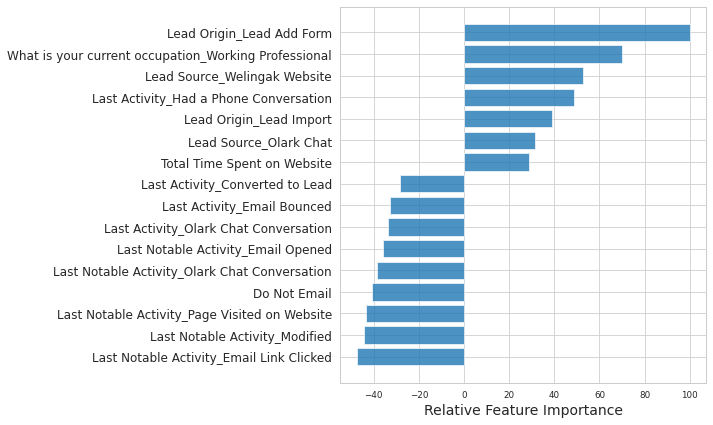

In [163]:
# Ploting the feature variables based on their relative coefficient values

pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:blue',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col5].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

### Final Model Reporting & Equation-

- log odds is given by: log(P/1-P) = c + B1X1 +B2X2 + B3X3 + .... + BnXn
    

- log odds = 0.18 +(-1.59 * Do Not Email) + (1.13 * Total Time Spent on Website) + (3.92 * Lead Origin_Lead Add Form) + (1.52 * Lead Origin_Lead Import) + (1.24 * Lead Source_Olark Chat) + (2.06 * Lead Source_Welingak website) + (-1.12 * Last Activity_Converted to Lead) + (-1.28 * Last Activity_Email Bounced) + (1.91 * Last Activity_Had a Phone Conversation) + (-1.32 * Last Activity_Olark Chat Conversation) + (2.75 * What is your current occupation_Working Professional) + (-1.86 * Last Notable Activity_Email Link Clicked) + (-1.40 * Last Notable Activity_Email Opened) + (-1.73 * Last Notable Activity_Modified) + (-1.52* Last Notable Activity_Olark Chat Conversation) + (-1.69 * Last Notable Activity_Page Visited on Website ) 

### Recommendations -

- The X-Education should focus on the leads having 

> *   lead origin - lead add form 
*   occupation - Working Professional
*   Lead source - Wellingak website

- Sales Team of the company should first focus on the 'Hot Leads' which are identified with having Lead Score above 35.
- Once the Sales Team is done with the 'Hot Leads' only after that they should focus on the 'Cold Leads'(Customer having lead score <= 35).
- Team can make some important variables mandatory to enter, such as city, specialization , occupation which can potentially explain Conversion better. It could be used in our model and build important decisions for the business.
- The model has a high recall score than precision score. Hence it can adjust with the company’s requirements in coming future.
- High Sensitivity in the model will ensure that almost all leads who are likely to Convert are correctly predicted.
- High Specificity in the model will ensure that leads that are on the brink of the probability of getting Converted or not, are not selected.
- Team can focus least on customers who do not want to be called about the course.
- If a customer's the Last Notable Activity is Modified, they may not be the potential lead.